In [1]:
#CROSS VALIDATION AND PIPELINE FUNCTIONALITY

In [4]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os


from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold,cross_val_predict
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [14]:
#lOAD IN THE PICKLE FILE

folder='IBM_DATA_C2_W2'
file='boston_housing_clean.pickle'
url=os.path.join(folder,file)

boston=pickle.load(open(url,"rb"))

In [16]:
boston.keys()

dict_keys(['dataframe', 'description'])

In [19]:
boston_data=boston['dataframe']
boston_description=boston['description']

In [22]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
boston_description

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

# KFold

In [27]:
#remove the outcome/target variable and keep only the predictors
X=boston_data.drop('MEDV',axis=1)

#the target variable
y=boston_data.MEDV

In [28]:
kf=KFold(shuffle=True,random_state=72018,n_splits=3)

In [32]:
kf.split(X)

<generator object _BaseKFold.split at 0x000001D29E377F20>

In [46]:
for train_index,test_index in kf.split(X):
    print('Train index (first 10 only displaying)',train_index[:10],'Split Length:',len(train_index))
    print('Test index (first 10 only displaying)',test_index[:10],'Split Length:',len(test_index))
    print()

Train index (first 10 only displaying) [ 1  3  4  5  7  8 10 11 12 13] Split Length: 337
Test index (first 10 only displaying) [ 0  2  6  9 15 17 19 23 25 26] Split Length: 169

Train index (first 10 only displaying) [ 0  2  6  9 10 11 12 13 15 17] Split Length: 337
Test index (first 10 only displaying) [ 1  3  4  5  7  8 14 16 22 27] Split Length: 169

Train index (first 10 only displaying) [0 1 2 3 4 5 6 7 8 9] Split Length: 338
Test index (first 10 only displaying) [10 11 12 13 18 20 21 24 28 31] Split Length: 168



In [38]:
#MEASURE THE MODEL ACCURACY
#r2_score, mean_squared_error

scores=[]
lr=LinearRegression()

for train_index,test_index in kf.split(X):
    X_train,X_test,y_train,y_test=(X.iloc[train_index,:],
                                   X.iloc[test_index,:],
                                    y[train_index],
                                    y[test_index])
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    score=r2_score(y_test.values,y_pred)
    scores.append(score)
scores

[0.6719348798472763, 0.7485020059212382, 0.6976807323597768]

<h2>CROSS VALIDATION</h2>

In [51]:
scores=[]
lr=LinearRegression()
s=StandardScaler()

for train_index,test_index in kf.split(X):
    X_train,X_test,y_train,y_test=(X.iloc[train_index,:],
                                   X.iloc[test_index,:],
                                    y[train_index],
                                    y[test_index])
    X_train_s=s.fit_transform(X_train)
    lr.fit(X_train_s,y_train)
    
    X_test_s=s.transform(X_test)
    y_pred=lr.predict(X_test_s)
    
    score=r2_score(y_test.values,y_pred)
    scores.append(score)
scores

[0.6719348798472715, 0.748502005921238, 0.6976807323597745]

<h2>PIPELINE AND CROSS_VAL_PREDICT</h2>

In [52]:
s=StandardScaler()
lr=LinearRegression()

In [ ]:
#pipeline

#A pipeline contains a series of steps. The name of step string is only used to help you identify which 
#step you are on, and to allow you to specify parameters at that step

#each model should have a fit method to be in a pipeline

In [53]:
estimator=Pipeline([('scaler',s),('regression',lr)])

In [54]:
estimator.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [55]:
estimator.predict(X_test)

array([19.44230308, 22.8687781 , 20.72201438, 20.19685225, 16.02553328,
       13.19670707, 18.48717304, 16.41260539, 20.08040483, 19.16027923,
       23.03341265, 23.52809897, 24.64808538, 23.84554003, 22.37992895,
       18.54423788,  9.23453025, 24.86310535, 27.35965358, 29.95093715,
       21.71928179, 18.63649236, 19.67735609, 29.98064881, 20.78659698,
       17.29484103, 20.88767674, 23.59352298, 23.01287114, 24.82516061,
       28.1550891 , 26.59019417, 28.40170962, 28.61954803, 28.99730977,
       25.46130359, 20.83346878, 21.39384122, 21.12590183, 24.80991192,
       22.64896843, 20.63582629, 20.04498128, 20.28679691, 16.04272023,
       15.75494076, 12.78067624, 11.43558055, 21.98898014, 23.31730716,
       24.28692882, 21.28789025, 14.88646576, 31.00959189, 35.37282463,
       37.57270926, 23.58942636, 24.75302163, 30.63215847, 34.85770942,
       32.94090699, 30.0536187 , 39.86200512, 29.05010705, 35.53401305,
       41.89294309, 23.54417467, 23.61752172,  8.51966664, 24.38

<h3>cross_val_predict</h3>
cross_val_predict is a function that does K-Fold cross validation for us, 
approximately fitting and transforming at every step of the way

In [56]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [58]:
prediction=cross_val_predict(estimator,X,y,cv=kf)

In [59]:
len(prediction)

506

In [62]:
r2_score(y,prediction)

0.706353106416156

In [64]:
#from data below without using cross_val_predict
np.mean(scores)

0.7060392060427613

# HYPERPARAMETER TUNING

<h3>Parameters: Are learned by the model using machine learning</h3>
<h2>VS</h2>
<h3>Hyperparameters: Parts of our model that are tuned by us (users)</h3> 

Hyperparameter tuning invloves using cross validation to determine which hyperparameters 
are most likely to generate a model that generalizes well outside of our sample

<h2>Mechanics</h2>

<h4>We can generate an exponentially spaces range of values using the numpy geomspace function</h4>


In [68]:
np.geomspace(2,8,3)

array([2., 4., 8.])

In [70]:
np.geomspace(1,100,3)

array([  1.,  10., 100.])

In [73]:
alphas=np.geomspace(1e-9,1e0,num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [75]:
scores=[]
coefs=[]

for alpha in alphas:
    las=Lasso(alpha=alpha,max_iter=100000)
    estimator=Pipeline([
        ('scaler',s),
        ('lasso_regression',las)
    ])
    prediction=cross_val_predict(estimator,X,y,cv=kf)
    score=r2_score(y,prediction)
    scores.append(score)

In [76]:
list(zip(alphas,scores))

[(1e-09, 0.7063531064981925),
 (1e-08, 0.7063531072356071),
 (1e-07, 0.7063531145602442),
 (1e-06, 0.7063531882052063),
 (1e-05, 0.7063539165191507),
 (0.0001, 0.706361268093463),
 (0.001, 0.706433467041546),
 (0.01, 0.7070865958083233),
 (0.1, 0.705838151167185),
 (1.0, 0.6512724532884887)]

In [77]:
Lasso(alpha=1e-6).fit(X,y).coef_

array([-1.07170372e-01,  4.63952623e-02,  2.08588308e-02,  2.68854318e+00,
       -1.77954207e+01,  3.80475296e+00,  7.50802707e-04, -1.47575348e+00,
        3.05654279e-01, -1.23293755e-02, -9.53459908e-01,  9.39253013e-03,
       -5.25467196e-01])

In [78]:
Lasso(alpha=1).fit(X,y).coef_

array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

Text(0, 0.5, '$R^2$')

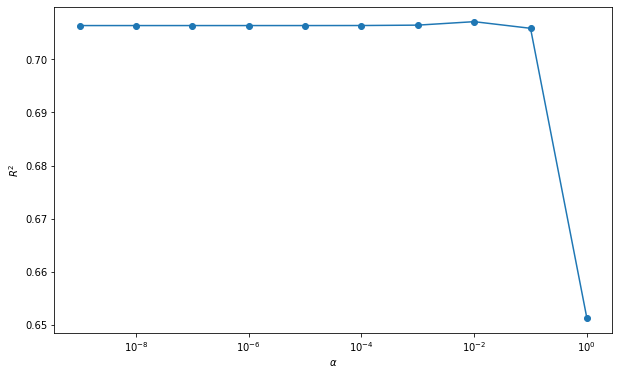

In [82]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas,scores,'-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$')

In [83]:
#Add POLYNOMIAL FEATURES TO THE PIPELINE

In [86]:
pf=PolynomialFeatures(degree=3)

scores=[]
alphas=np.geomspace(0.001,10,5)
for alpha in alphas:
    las=Lasso(alpha=alpha,max_iter=100000)
    estimator=Pipeline([
        ('make_higher_degree',pf),
        ('scaler',s),
        ('lasso_regression',las)
    ])
    prediction=cross_val_predict(estimator,X,y,cv=kf)
    score=r2_score(y,prediction)
    scores.append(score)

c:\pythoninstalled\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.084e+01, tolerance: 2.735e+00
  model = cd_fast.enet_coordinate_descent(
c:\pythoninstalled\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.343e+01, tolerance: 2.777e+00
  model = cd_fast.enet_coordinate_descent(
c:\pythoninstalled\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.885e+01, tolerance: 3.030e+00
  mod

In [87]:
alphas

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [89]:
scores

[0.7697086980421659,
 0.8591002095361691,
 0.8280423631185617,
 0.7328688516176427,
 -0.000616160136140298]

In [90]:
list(zip(alphas,scores))

[(0.001, 0.7697086980421659),
 (0.01, 0.8591002095361691),
 (0.1, 0.8280423631185617),
 (1.0, 0.7328688516176427),
 (10.0, -0.000616160136140298)]

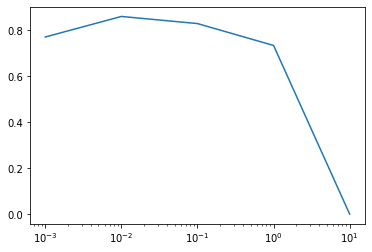

In [91]:
plt.semilogx(alphas,scores)

In [93]:
#once we have found the hyperparameter (alpha-1e-2=0.1)
#make the ,odel and train it on ALL the data
#then release it into the wild .....

best_estimator=Pipeline([
    ('make_higher_degree',PolynomialFeatures(degree=2)),
    ('scaler',s),
    ('lasso_regression',Lasso(alpha=0.01,max_iter=10000))
])

best_estimator.fit(X,y)
best_estimator.score(X,y)

0.9032551408154241

In [94]:
best_estimator.named_steps["lasso_regression"].coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        4.61127587e+00,  0.00000000e+00,  6.24240557e-01,  0.00000000e+00,
       -7.22878514e+00,  9.74968793e+00,  0.00000000e+00,  0.00000000e+00,
        6.34548325e-01,  0.00000000e+00,  9.95741679e-01, -5.51374291e-03,
       -0.00000000e+00,  2.44370838e+00, -2.40444044e+00, -0.00000000e+00,
       -0.00000000e+00, -2.23044443e-01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -2.88128934e-01,  5.17203914e-01,  3.07715719e-01,
       -3.39853933e-01, -9.86590910e-02, -0.00000000e+00,  2.72847487e-01,
       -0.00000000e+00, -6.39829763e-01, -3.16474346e-01,  1.44555554e+00,
        0.00000000e+00, -0.00000000e+00, -8.84630187e-01,  1.32081558e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.63148300e+00,
       -2.62941147e-01,  0.00000000e+00,  9.08410143e-01, -8.17144528e-01,
        0.00000000e+00, -4.31628234e+00,  5.53254405e-01, -2.91912598e+00,
       -4.68486241e+00,  

# RIDGE REGRESSION

In [101]:
pf=PolynomialFeatures(degree=2)

scores=[]
alphas=np.geomspace(0.1,2,20)
for alpha in alphas:
    ridge=Ridge(alpha=alpha,max_iter=100000)
    estimator=Pipeline([
        ('make_higher_degree',pf),
        ('scaler',s),
        ('ridge_regression',ridge)
    ])
    prediction=cross_val_predict(estimator,X,y,cv=kf)
    score=r2_score(y,prediction)
    scores.append(score)

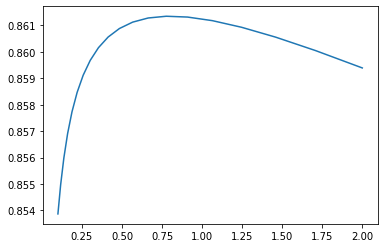

In [102]:
plt.plot(alphas,scores)

In [104]:
#CONCLUSION : BOTH LASSO AND RIDGE WITH PROPER HYPERPARAMATER TUNING GIVE BETTER RESULT THAN PLAIN LINEAR REGRESSION

In [106]:
#FOR INTERPRETABILITY OF A MODEL WE NEED TO MAKE SURE EVERY FEATURE IS IN THE SAME SCALE 

# GRID SEARCH CV 

In [111]:
#To do cross validation we used two techniques
#->Use KFolds and manually create a loop to do cross validation
#->Use cross_val_predict and score to get a cross_validated score in a couple of lines

#To do hyper parameter tuning we see a general pattern
#->Use cross_val_predict and score in a manually written loop over hyperparameters then select the best one

#GridSearchV does this for us 

In [124]:
from sklearn.model_selection import GridSearchCV

estimator=Pipeline([
    ('polynomial_features',PolynomialFeatures()),
    ('scalar',StandardScaler()),
    ('ridge_regression',Ridge())
])
params={
    'polynomial_features__degree':[1,2,3],
    'ridge_regression__alpha':np.geomspace(4,20,30)
}
grid=GridSearchCV(estimator,params,cv=kf)

In [125]:
grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scalar', StandardScaler()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [126]:
grid.best_score_,grid.best_params_

(0.8546333782070435,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 4.0})

In [127]:
y_predict=grid.predict(X)

In [128]:
r2_score(y,y_predict)

0.8964707714558101

In [129]:
grid.cv_results_

{'mean_fit_time': array([0.00700068, 0.00466824, 0.00400289, 0.0033342 , 0.00332046,
        0.00434581, 0.00331823, 0.00400082, 0.00399947, 0.00366672,
        0.00500139, 0.00333397, 0.00466768, 0.00399947, 0.00333373,
        0.00433509, 0.00433381, 0.00366751, 0.00400043, 0.00333277,
        0.00333357, 0.00433397, 0.00399979, 0.00366688, 0.00366704,
        0.00300042, 0.00566808, 0.00566634, 0.00566602, 0.0043335 ,
        0.00666547, 0.00666714, 0.00433326, 0.0049994 , 0.00633581,
        0.00633605, 0.00800014, 0.00766579, 0.00566808, 0.0053335 ,
        0.00500011, 0.00533358, 0.00933695, 0.01199937, 0.00666658,
        0.0100023 , 0.00933337, 0.00800212, 0.00800069, 0.00700124,
        0.00733201, 0.00733431, 0.00533477, 0.00433199, 0.00566641,
        0.00466768, 0.00466585, 0.0046649 , 0.00566641, 0.00532969,
        0.01433174, 0.01766769, 0.01466568, 0.01533286, 0.01633477,
        0.01433142, 0.01299977, 0.01399867, 0.01866841, 0.01399994,
        0.01266678, 0.01366671,

In [130]:
#RandomSearchCV is also present